In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
import time
import sys

In [ ]:


#Creating a pandas dataframe from training and test datasets


df = pd.read_csv(sys.argv[0])
df_test = pd.read_csv(sys.argv[1])



In [ ]:
#Z-score Normalization of features
df_0=df
df_test_0=df_test
df=(df-df.mean())/df.std()
df_test=(df_test-df_test.mean())/df_test.std()

In [ ]:
df.describe()


,x1,x2,x3,x4,x5,x6,t
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,-9.473903e-17,4.736952e-17,2.842171e-16,4.736952e-17,-4.736952e-17,-4.736952e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-1.774150e+00,-1.905100e+00,-1.820826e+00,-1.839973e+00,-9.303430e-01,-2.409972e+00,-1.870295
25%,-8.561592e-01,-8.527334e-01,-8.496662e-01,-7.907508e-01,-4.260869e-01,-8.541833e-01,-0.844160
50%,4.046339e-03,2.157648e-02,-1.709611e-02,-4.304021e-03,-3.171792e-02,1.042396e-02,-0.004231
75%,8.714464e-01,8.676655e-01,8.478344e-01,7.672913e-01,3.831322e-01,8.801272e-01,0.845339
max,2.388403e+00,2.004350e+00,1.850578e+00,1.512422e+01,3.044284e+01,1.780973e+00,1.818757


In [ ]:
df_test.describe()

,x1,x2,x3,x4,x5,x6,t
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-1.136868e-15,1.705303e-15,2.842171e-16,-5.684342e-16,9.947598e-16,2.131628e-16,-1.492140e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.891778e+00,-6.591822e+00,-1.225242e+01,-9.669971e+00,-4.085000e+00,-1.810032e+00,-1.182898e+01
25%,-8.506557e-01,-8.048527e-01,-6.572411e-01,-5.594456e-01,-7.644565e-01,-7.924847e-01,-6.788013e-01
50%,4.961360e-03,3.892490e-02,3.826281e-02,3.372522e-02,4.597867e-02,-8.808624e-03,2.141144e-02
75%,8.272645e-01,7.953599e-01,7.291429e-01,6.243265e-01,7.486659e-01,8.595580e-01,7.426102e-01
max,2.102289e+00,1.837548e+00,1.632931e+00,1.952429e+00,2.263684e+00,4.978300e+00,1.667515e+00


In [ ]:
#Training set Correlation Matrix
df.corr()

,x1,x2,x3,x4,x5,x6,t
x1,1.000000,0.983218,0.971908,0.847482,0.475974,-0.996590,0.970183
x2,0.983218,1.000000,0.973034,0.847281,0.476185,-0.983578,0.971919
x3,0.971908,0.973034,1.000000,0.851716,0.480625,-0.971250,0.998455
x4,0.847482,0.847281,0.851716,1.000000,0.409703,-0.845230,0.878992
x5,0.475974,0.476185,0.480625,0.409703,1.000000,-0.476806,0.479483
x6,-0.996590,-0.983578,-0.971250,-0.845230,-0.476806,1.000000,-0.969157
t,0.970183,0.971919,0.998455,0.878992,0.479483,-0.969157,1.000000


In [ ]:
#Test set Correlation Matrix
df_test.corr()

,x1,x2,x3,x4,x5,x6,t
x1,1.000000,0.875172,0.738510,0.570985,0.800174,-0.969179,0.742666
x2,0.875172,1.000000,0.928786,0.600407,0.810713,-0.866064,0.933070
x3,0.738510,0.928786,1.000000,0.507375,0.670690,-0.727068,0.995228
x4,0.570985,0.600407,0.507375,1.000000,0.746273,-0.588154,0.586508
x5,0.800174,0.810713,0.670690,0.746273,1.000000,-0.806430,0.704829
x6,-0.969179,-0.866064,-0.727068,-0.588154,-0.806430,1.000000,-0.732538
t,0.742666,0.933070,0.995228,0.586508,0.704829,-0.732538,1.000000


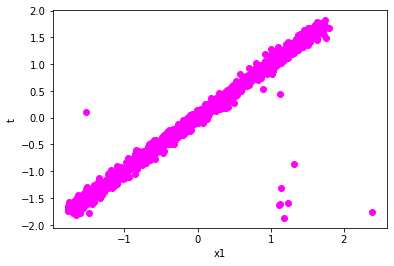

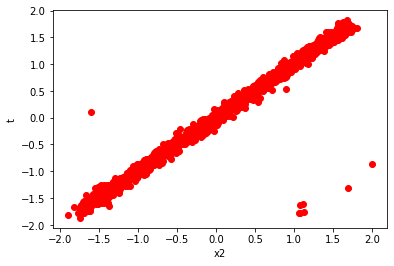

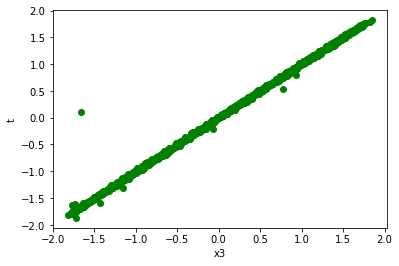

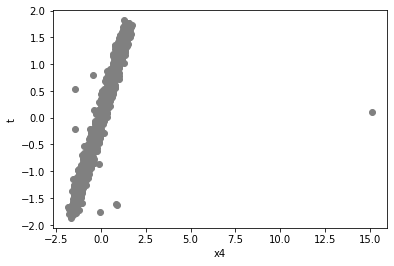

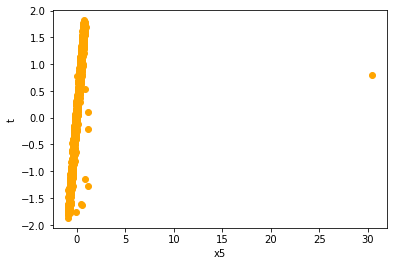

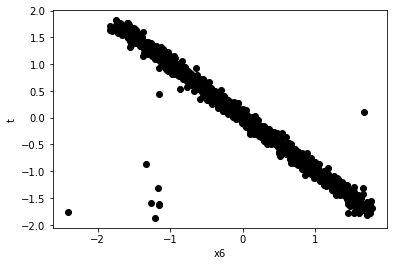

In [ ]:
#Scatter Plots of Training Data features against target variable
df.corr()
plt.scatter(df.x1,df.t,color="magenta")
plt.xlabel("x1") 
plt.ylabel("t")
plt.show()
plt.scatter(df.x2,df.t,color="red")
plt.xlabel("x2") 
plt.ylabel("t")
plt.show()
plt.scatter(df.x3,df.t,color="green")
plt.xlabel("x3") 
plt.ylabel("t")
plt.show()
plt.scatter(df.x4,df.t,color="gray")
plt.xlabel("x4") 
plt.ylabel("t")
plt.show()
plt.scatter(df.x5,df.t,color="orange")
plt.xlabel("x5") 
plt.ylabel("t")
plt.show()
plt.scatter(df.x6,df.t,color="black")
plt.xlabel("x6") 
plt.ylabel("t")
plt.show()

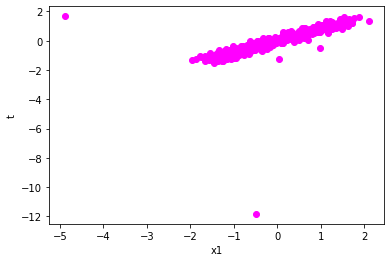

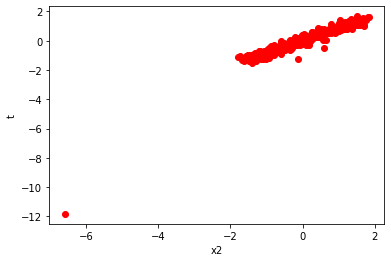

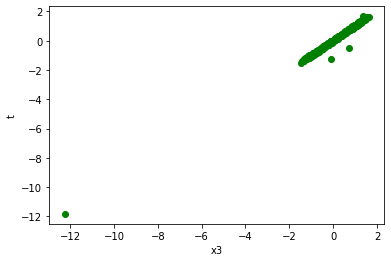

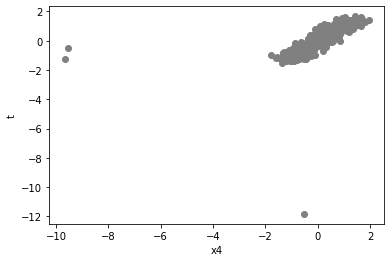

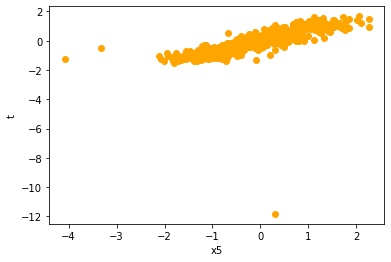

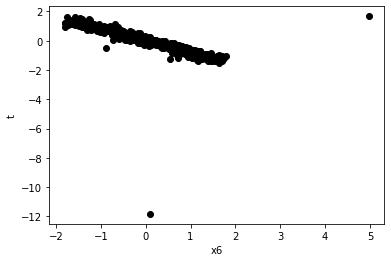

In [ ]:
#Scatter Plots of TestData features against target variable
df.corr()
plt.scatter(df_test.x1,df_test.t,color="magenta")
plt.xlabel("x1") 
plt.ylabel("t")
plt.show()
plt.scatter(df_test.x2,df_test.t,color="red")
plt.xlabel("x2") 
plt.ylabel("t")
plt.show()
plt.scatter(df_test.x3,df_test.t,color="green")
plt.xlabel("x3") 
plt.ylabel("t")
plt.show()
plt.scatter(df_test.x4,df_test.t,color="gray")
plt.xlabel("x4") 
plt.ylabel("t")
plt.show()
plt.scatter(df_test.x5,df_test.t,color="orange")
plt.xlabel("x5") 
plt.ylabel("t")
plt.show()
plt.scatter(df_test.x6,df_test.t,color="black")
plt.xlabel("x6") 
plt.ylabel("t")
plt.show()

In [ ]:
#Changing datafrom from panda to numpy
#Training Data
D_train=df.to_numpy()
X_train=D_train[:,:6]
Y_train=D_train[:,-1]
#Test Data
D_test=df_test.to_numpy()
X_test=D_test[:,:6]
Y_test=D_test[:,-1]

In [ ]:
def CostFunction(w,b,x,y):
    res=0
    N=len(x)
    y_hat=np.dot(x,w)+b
    e=y_hat-y
    r=np.dot(e,e)
    return r.mean()/2

In [ ]:
#Linear Regression using SGD
class SGDRegression:
    w=0
    b=0
    epochs=0
    lr=0
    num_epochs=[]
    training_cost=[]
    test_cost=[]
    training_weights=[]
    def __init__(self,learning_rate,epochs):
        self.w=None
        self.b=None
        self.lr=learning_rate
        self.epochs=epochs
        self.num_epochs=[]
        self.training_cost=[]
        self.test_cost=[]
        self.training_weights=[]
    def NonRegularisedFit(self,X_train,Y_train):
        self.w=np.ones(X_train.shape[1])#Initializing Model Parameters
        self.b=0
        N=X_train.shape[0]
        a=X_train.shape[1]
        data=np.column_stack((X_train,Y_train))
        for i in range(self.epochs):
            np.random.shuffle(data)
            X_train=data[:,:a]
            Y_train=data[:,-1]
            for i in range(N):
                e=np.dot(self.w,X_train[i])+self.b-Y_train[i]
                dw=e*X_train[i]
                db=e
                self.w-=self.lr*dw
                self.b-=self.lr*db
        return (self.w,self.b)
    def ModifiedFit(self,X_train,Y_train):
        self.w=np.ones(X_train.shape[1])#Initializing Model Parameters
        self.b=0
        N=X_train.shape[0]
        for i in range(self.epochs):
            self.num_epochs.append(i+1)
            self.training_cost.append(CostFunction(self.w,self.b,X_train,Y_train))
            self.test_cost.append(CostFunction(self.w,self.b,X_test,Y_test))
            ind=np.random.randint(0,N)
            e=np.dot(self.w,X_train[ind])+self.b-Y_train[ind]
            dw=e*X_train[ind]
            db=e
            self.w-=self.lr*dw
            self.b-=self.lr*db
    def LassoRegularisedFit(self,lambda_,X_train,Y_train):
        self.w=np.ones(X_train.shape[1])#Initializing Model Parameters
        self.b=0
        N=X_train.shape[0]
        a=X_train.shape[1]
        data=np.column_stack((X_train,Y_train))
        for i in range(self.epochs):
            np.random.shuffle(data)
            X_train=data[:,:a]
            Y_train=data[:,-1]
            for i in range(N):
                e=np.dot(self.w,X_train[i])+self.b-Y_train[i]
                dw=e*X_train[i]+(lambda_/2)*np.sign(self.w)
                db=e
                self.w-=self.lr*dw
                self.b-=self.lr*db
        return (self.w,self.b)
    def RidgeRegularisedFit(self,lambda_,X_train,Y_train):
        self.w=np.ones(X_train.shape[1])#Initializing Model Parameters
        self.b=0
        N=X_train.shape[0]
        a=X_train.shape[1]
        data=np.column_stack((X_train,Y_train))
        for i in range(self.epochs):
            np.random.shuffle(data)
            X_train=data[:,:a]
            Y_train=data[:,-1]
            for i in range(N):
                e=np.dot(self.w,X_train[i])+self.b-Y_train[i]
                dw=e*X_train[i]+lambda_*self.w
                db=e
                self.w-=self.lr*dw
                self.b-=self.lr*db
        return (self.w,self.b)
    def LearningCurveFit(self,X_train,Y_train,Regularisation=None,lambda_=None,test=None,X_test=None,Y_test=None):
        self.w=np.ones(X_train.shape[1])#Initializing Model Parameters
        self.b=0
        N=X_train.shape[0]
        a=X_train.shape[1]
        data=np.column_stack((X_train,Y_train))
        for i in range(self.epochs):
            self.training_weights.append(self.w.copy())
            self.training_cost.append(CostFunction(self.w,self.b,X_train,Y_train))
            if(test!=None):
                self.test_cost.append(CostFunction(self.w,self.b,X_test,Y_test))
            self.num_epochs.append(i+1)
            np.random.shuffle(data)
            X_train=data[:,:a]
            Y_train=data[:,-1]
            for i in range(N):
                e=np.dot(self.w,X_train[i])+self.b-Y_train[i]
                dw=e*X_train[i]
                db=e
                if(Regularisation!=None and Regularisation=="Lasso"):
                    dw+=(lambda_/2)*np.sign(self.w)
                elif(Regularisation!=None and Regularisation=="Ridge"):
                    dw+=lambda_*self.w
                self.w-=self.lr*dw
                self.b-=self.lr*db
        return (self.w,self.b)
    def predict(self,X_test):
        y=np.array(np.dot(X_test,self.w) + self.b)
        return y
    def loss(self,X,Y):
        e=np.dot(X,self.w)+self.b-Y
        x=np.dot(e,e)
        return x.mean()/2
    def lassoloss(self,lambda_,X,Y):
        e=np.dot(X,self.w)+self.b-Y
        N=X.shape[0]
        x=np.dot(e,e)
        loss=x.mean()/2
        loss+=(lambda_/(2*N))*np.dot(np.sign(self.w),self.w)
        return loss
    def ridgeloss(self,lambda_,X,Y):
        e=np.dot(X,self.w)+self.b-Y
        N=X.shape[0]
        x=np.dot(e,e)
        loss=x.mean()/2
        loss+=(lambda_/(2*N))*np.dot(self.w,self.w)
        return loss

In [ ]:
v=np.array([1,2])
print(np.dot(v,v))

5


In [ ]:
#Linear Regression using BGD
class BGDRegression:
    w=0
    b=0
    epochs=0
    lr=0
    num_epochs=[]
    training_cost=[]
    test_cost=[]
    
    def __init__(self,learning_rate,epochs):
        self.w=None
        self.b=None
        self.lr=learning_rate
        self.epochs=epochs
        self.num_epochs=[]
        self.training_cost=[]
        self.test_cost=[]
    def fit(self,X_train,Y_train):
        self.w=np.ones(X_train.shape[1])#Initializing Model Parameters
        self.b=0
        N=X_train.shape[0]
        for i in range(self.epochs):
            y_hat=np.dot(X_train,self.w)+self.b
            e=y_hat-Y_train
            dw=np.dot(e,X_train)/N
            db=e.mean()
            self.w-=self.lr*dw
            self.b-=self.lr*db
        return (self.w,self,b)
    def LearningCurveFit(self,X_train,Y_train,Batch_Size,test=None,X_test=None,Y_test=None):
        self.w=np.ones(X_train.shape[1])#Initializing Model Parameters
        self.b=0
        N=X_train.shape[0]
        for i in range(self.epochs):
            self.training_cost.append(CostFunction(self.w,self.b,X_train,Y_train))
            if(test!=None):
                self.test_cost.append(CostFunction(self.w,self.b,X_test,Y_test))
            self.num_epochs.append(i+1)
            for j in range(N//Batch_Size):
                X_1=X_train[j*Batch_Size:(j+1)*Batch_Size,:]
                Y_1=Y_train[j*Batch_Size:(j+1)*Batch_Size,]
                y_hat=np.dot(X_1,self.w)+self.b
                e=y_hat-Y_1
                dw=np.dot(e,X_1)/Batch_Size
                db=e.mean()
                self.w-=self.lr*dw
                self.b-=self.lr*db
        return (self.w,self.b)
    def predict(self,X_test):
        y=np.array(np.dot(X_test,self.w) + self.b)
        print(len(y))
        return y
    def loss(self,X,Y):
        e=np.dot(X,self.w)+self.b-Y
        x=np.dot(e,e)
        return x.mean()/2

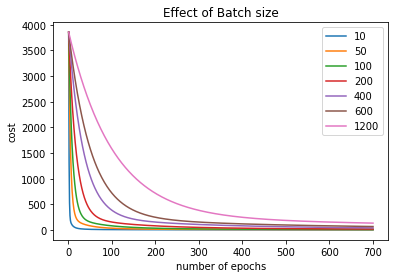

In [ ]:
#Effect of Batch Size-Loss Curve-BGD
z=[10,50,100,200,400,600,1200]
legend=[]
for i in z:
    b=BGDRegression(0.001,700)
    b.LearningCurveFit(X_train,Y_train,i)
    plt.plot(b.num_epochs,b.training_cost)
    plt.xlabel("number of epochs")
    plt.ylabel("cost")
    legend.append(i)
plt.title("Effect of Batch size")
plt.legend(legend)
plt.show()

In [ ]:
#Effect of Batch Size-Weights-BGD
z=[10,50,100,200,400,600,1200]
legend=[]
for i in z:
    b=BGDRegression(0.009,1200)
    b.LearningCurveFit(X_train,Y_train,i)
    print('Validation loss=',b.loss(X_test,Y_test),"Training loss =",b.loss(X_train,Y_train),"Weights(w,b) =","[",*b.w,"] ,",b.b)

Validation loss= 0.14617024023059325 Training loss = 0.0005951513080626125 Weights(w,b) = [ 0.012175774578801693 0.004684271267401802 0.9489431188754189 0.10685643579754578 2.0347152708399616e-05 0.05958142925961652 ] , -2.7856155196695996e-06
Validation loss= 2.27805564212089 Training loss = 0.6819200030364538 Weights(w,b) = [ 0.40729787262751044 0.019173009628112324 0.941193817222136 0.10385037048155933 0.0005546213036667185 0.45885253614624893 ] , 9.976068411723646e-05
Validation loss= 5.347784409129188 Training loss = 1.6857989656878931 Weights(w,b) = [ 0.6140645890524374 0.07382717183446516 0.9244028568291264 0.10211956997196535 0.0009069840879617618 0.702282259003234 ] , 7.659153334686186e-05
Validation loss= 9.062108317571418 Training loss = 3.1355048494693225 Weights(w,b) = [ 0.7179840503628993 0.2170985936338495 0.8814416148489648 0.10113319307686387 0.001339090048051759 0.9058834457185087 ] , 0.00012070734490419736
Validation loss= 13.206351777465173 Training loss = 5.3202986

Validation loss= 0.36890784640208907 Training loss = 0.06768172906219315 Weights(w,b) = [ 0.1288909027143411 0.0077740166661511454 0.9469730661240464 0.10587441825865973 9.001966981950546e-05 0.17665738499268327 ] , 9.678431007837335e-05


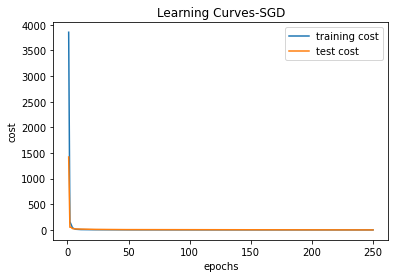

In [ ]:
#SGD weights
b=SGDRegression(0.002,250)
b.LearningCurveFit(X_train,Y_train,None,None,0,X_test,Y_test)
print('Validation loss=',b.loss(X_test,Y_test),"Training loss =",b.loss(X_train,Y_train),"Weights(w,b) =","[",*b.w,"] ,",b.b)
plt.plot(b.num_epochs,b.training_cost)
plt.plot(b.num_epochs,b.test_cost)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("Learning Curves-SGD")
plt.legend(["training cost","test cost"])
plt.show()

Validation loss= 0.24725549215080644 Training loss = 0.03003870463563575 Weights(w,b) = [ 0.08588714583006961 0.006636129560077992 0.9476642307138199 0.10628400827172553 0.00011066737120374007 0.13356269334002027 ] , -2.759896478021785e-16


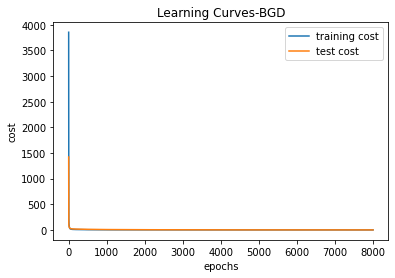

In [ ]:
#BGD weights
b=BGDRegression(0.09,8000)
b.LearningCurveFit(X_train,Y_train,1200,0,X_test,Y_test)
print('Validation loss=',b.loss(X_test,Y_test),"Training loss =",b.loss(X_train,Y_train),"Weights(w,b) =","[",*b.w,"] ,",b.b)
plt.plot(b.num_epochs,b.training_cost)
plt.plot(b.num_epochs,b.test_cost)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("Learning Curves-BGD")
plt.legend(["training cost","test cost"])
plt.show()

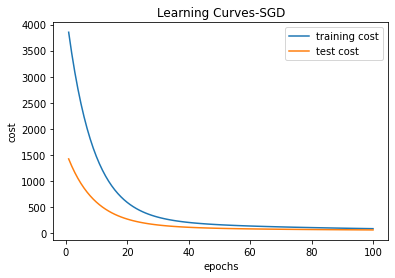

In [ ]:
#Test vs Training Loss Curve-SGD
s=SGDRegression(0.00001,100)
s.LearningCurveFit(X_train,Y_train,None,None,0,X_test,Y_test)
plt.plot(s.num_epochs,s.training_cost)
plt.plot(s.num_epochs,s.test_cost)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("Learning Curves-SGD")
plt.legend(["training cost","test cost"])
plt.show()

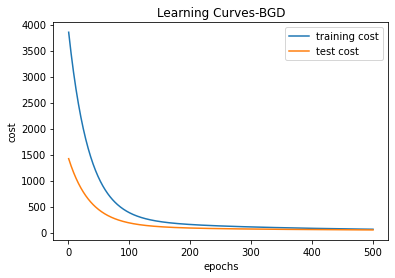

In [ ]:
#Test vs Training Loss Curve-BGD
b=BGDRegression(0.003,500)
b.LearningCurveFit(X_train,Y_train,1200,0,X_test,Y_test)
plt.plot(b.num_epochs,b.training_cost)
plt.plot(b.num_epochs,b.test_cost)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("Learning Curves-BGD")
plt.legend(["training cost","test cost"])
plt.show()

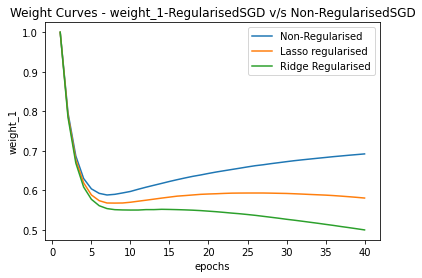

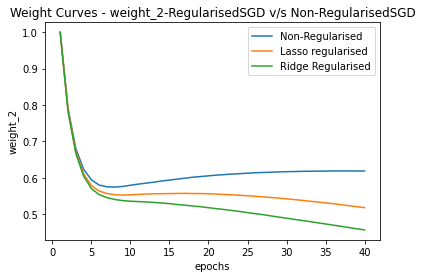

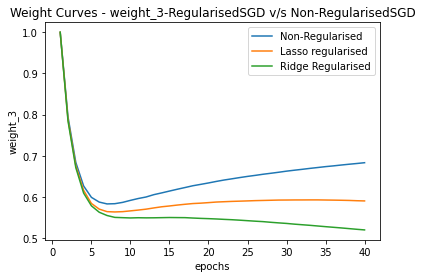

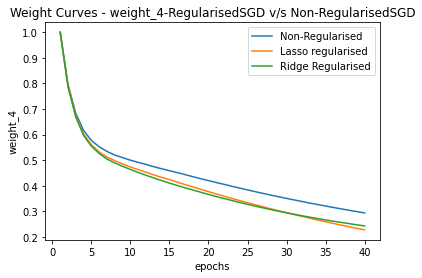

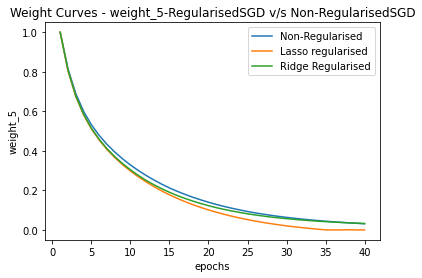

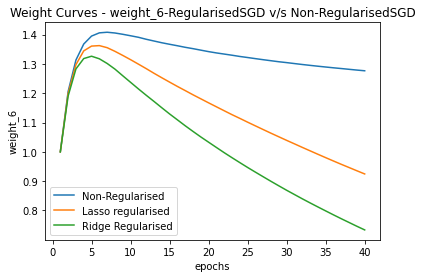

In [ ]:
#Regularization
#Test vs Training Loss Curve-LassoRegularisedSGD
for i in range(X_train.shape[1]):
    s=SGDRegression(0.0001,40)
    s.LearningCurveFit(X_train,Y_train)
    plt.plot(s.num_epochs,np.array(s.training_weights)[:,i])
    s=SGDRegression(0.0001,40)
    s.LearningCurveFit(X_train,Y_train,"Lasso",0.1)
    plt.plot(s.num_epochs,np.array(s.training_weights)[:,i])
    s=SGDRegression(0.0001,40)
    s.LearningCurveFit(X_train,Y_train,"Ridge",0.1)
    plt.plot(s.num_epochs,np.array(s.training_weights)[:,i])
    plt.xlabel("epochs")
    plt.ylabel("weight_{}".format(i+1))
    plt.title("Weight Curves - weight_{}-RegularisedSGD v/s Non-RegularisedSGD".format(i+1))
    plt.legend(["Non-Regularised","Lasso regularised","Ridge Regularised"])
    plt.show()

In [ ]:
#Feature Engineering

Text(0, 0.5, 'MSE')

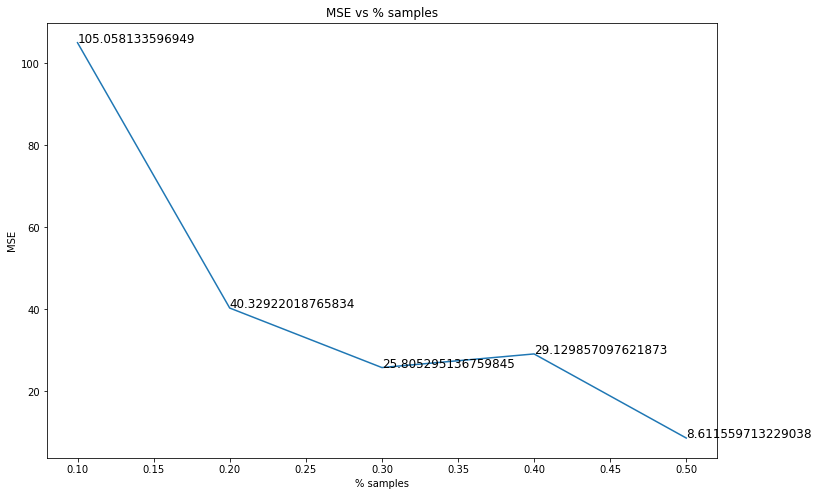

In [ ]:
#Effect On Sample Distribution
sample=[0.1,0.2,0.3,0.4,0.5]
MSE=[]
for x in sample:
    df_new=df.sample(frac=x)
    df_new=df_new.to_numpy()
    s=SGDRegression(0.001,100)
    s.NonRegularisedFit(df_new[:,:df_new.shape[1]-1],df_new[:,df_new.shape[1]-1])
    MSE.append(s.loss(X_test,Y_test))
fig, ax = plt.subplots(figsize=(12,8))
for index in range(len(sample)):
  ax.text(sample[index], MSE[index], MSE[index], size=12)
plt.plot(sample,MSE)
plt.title("MSE vs % samples")
plt.xlabel("% samples")
plt.ylabel("MSE")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Test Run
st=time.time()
s=SGDRegression(0.0023,250)
s.NonRegularisedFit(X_train,Y_train)
end=time.time()
print("Training Loss = ",s.loss(X_train,Y_train),", Test Loss = ",s.loss(X_test,Y_test))
print('regression score =',r2_score(s.predict(X_test).T,Y_test))
print("time=  ",end-st)

Training Loss =  0.037980661913712535 , Test Loss =  0.2604495512810018
regression score = 0.9986374979491676
time=   2.396101951599121


In [ ]:
#Test Run
st=time.time()
s=SGDRegression(0.0023,200)
s.LassoRegularisedFit(0.00122,X_train,Y_train)
end=time.time()
print("Training Loss = ",s.lassoloss(0.00122,X_train,Y_train),", Test Loss = ",s.lassoloss(0.00122,X_test,Y_test))
print('regression score =',r2_score(s.predict(X_test).T,Y_test))
print("time=  ",end-st)

Training Loss =  0.004741917608651615 , Test Loss =  0.1628121930731745
regression score = 0.9991383393413198
time=   2.603419065475464


In [ ]:
#Test Run
st=time.time()
s=SGDRegression(0.0023,200)
s.RidgeRegularisedFit(0.0012,X_train,Y_train)
end=time.time()
print("Training Loss = ",s.ridgeloss(0.00122,X_train,Y_train),", Test Loss = ",s.ridgeloss(0.00122,X_test,Y_test))
print('regression score =',r2_score(s.predict(X_test).T,Y_test))
print("time=  ",end-st)

Training Loss =  0.03899133857438929 , Test Loss =  0.23195510039661418
regression score = 0.9987745672031407
time=   2.4028894901275635


In [ ]:
#Test Run
st=time.time()
b=BGDRegression(0.35,1000000)
b.fit(X_train,Y_train)
end=time.time()
print("Training Loss = ",b.loss(X_train,Y_train),", Test Loss = ",b.loss(X_test,Y_test))
print('regression score =',r2_score(b.predict(X_test).T,Y_test))
print("time=  ",end-st)

KeyboardInterrupt: ignored

In [ ]:
#Noise in the DataSet
s=SGDRegression(0.0023,200)
s.LassoRegularisedFit(0.00122,X_train,Y_train)
y_hat_1=s.predict(X_train)
e1=Y_train-y_hat_1
print("Variance of TrainingDataSet Noise is",e1.var(),"mean is",e1.mean())
y_hat_2=s.predict(X_test)
e2=Y_test-y_hat_2
print("Variance of TestDataSet Noise is",e2.var(),"mean is",e2.mean())


In [ ]:
#Optimal Weights

s.w

array([0.08036243, 0.01700266, 0.92353862, 0.10779419, 0.00125034,
       0.11599331])

In [ ]:
'''
Feature Engineering 
'''

def f( X_train , Y_train):

 X_train_new = X_train[:,2:6]
 Y_train_new = Y_train
 b=SGDRegression(0.002,250)
 b.NonRegularisedFit(X_train_new,Y_train_new)
 yhat = b.predict(X_test[:,2:6])
 accu = r2_score(Y_test, yhat)

 print("Training Loss = ",b.loss(X_train_new,Y_train_new),", Test Loss = ",b.loss(X_test[:,2:6],Y_test))
 print('regression score =',r2_score(b.predict(X_test[:,2:6]).T,Y_test))


f(X_train ,Y_train)

Training Loss =  0.00030872448854488344 , Test Loss =  0.14515983178497677
regression score = 0.9992365437410624


In [ ]:
import os
import numpy as np
home = os.path. expanduser("~")
np.savetxt(f"{home}+sys.argv[0]", yhat)


0.9992660857145409